## `Introduction to Gradient Descent: Gradient, Stochastic, and Mini-batch Variants`

Gradient Descent is a cornerstone optimization algorithm in machine learning and artificial intelligence. It's fundamental to training models by minimizing the error or cost function. The core idea behind gradient descent is to iteratively adjust the model parameters in the direction of the steepest decrease in the cost function, ultimately finding the optimal values that minimize this function.

`Types of Gradient Descent`
1-Batch Gradient Descent (BGD):
* Batch Gradient Descent computes the gradient of the cost function with respect to the parameters for the entire training dataset. It updates the parameters by taking a step in the direction of the negative gradient. This approach ensures a stable convergence but can be computationally expensive and slow for large datasets.

2-Stochastic Gradient Descent (SGD):
* Stochastic Gradient Descent addresses the inefficiency of Batch Gradient Descent by updating the parameters for each training example individually. This means the parameters are adjusted more frequently, which can lead to faster convergence. However, due to its noisy updates, SGD might overshoot the minimum or struggle with convergence stability.

3-Mini-batch Gradient Descent:

* Mini-batch Gradient Descent strikes a balance between BGD and SGD by dividing the dataset into small batches. The gradient is computed for each batch, providing a compromise that leverages the stability of BGD and the speed of SGD. This method benefits from vectorized operations in modern computing hardware, leading to faster and more efficient training.

`Importance in Machine Learning`

Gradient Descent and its variants are crucial for training various machine learning models, including linear regression, logistic regression, and deep neural networks. Understanding the nuances of each variant helps in selecting the appropriate optimization strategy based on the problem at hand, dataset size, and computational resources.

`Objectives of this Notebook`

In this notebook, we will:

1-Implement Batch Gradient Descent, Stochastic Gradient Descent, and Mini-batch Gradient Descent algorithms.

2-Compare the performance of these algorithms on a sample dataset.

3-Analyze their convergence behavior and computational efficiency.

By the end of this notebook, you will have a comprehensive understanding of the different gradient descent methods and their practical implications in training machine learning models.

<img src="https://statusneo.com/wp-content/uploads/2023/09/Credit-Analytics-Vidya.jpg" alt="Your Image" width="1000" height="500"/>


# Liberaries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML

# Random data

In [3]:
X = 2 * np.random.rand(50, 1)
y = (4 + 3 * X + np.random.randn(50, 1)).flatten() 

In [4]:
X = X.reshape(-1, 1)

In [5]:
X_new = np.insert(arr=X, obj=0, values=1, axis=1)
X_new

array([[1.        , 1.518094  ],
       [1.        , 0.09202743],
       [1.        , 1.37271149],
       [1.        , 1.25330324],
       [1.        , 0.88692692],
       [1.        , 0.83821276],
       [1.        , 0.19376365],
       [1.        , 1.5657365 ],
       [1.        , 0.17853057],
       [1.        , 0.30982531],
       [1.        , 0.9886113 ],
       [1.        , 0.23668313],
       [1.        , 1.33970402],
       [1.        , 0.4201024 ],
       [1.        , 0.4170677 ],
       [1.        , 1.18556134],
       [1.        , 0.96511352],
       [1.        , 1.02827981],
       [1.        , 0.02618122],
       [1.        , 1.44116421],
       [1.        , 1.33191094],
       [1.        , 1.69623563],
       [1.        , 1.08856631],
       [1.        , 1.4526575 ],
       [1.        , 1.50201217],
       [1.        , 0.76751222],
       [1.        , 0.17963907],
       [1.        , 1.80465368],
       [1.        , 1.55859789],
       [1.        , 0.19105656],
       [1.

In [6]:
y

array([ 6.63873101,  2.86645436,  8.6131756 ,  8.96392209,  5.84161047,
        4.82629097,  4.20486713,  8.28634499,  5.0210575 ,  4.34602178,
        7.76666241,  4.6090087 ,  8.39359691,  6.30264697,  4.99918784,
       10.33294864,  7.00720199,  5.8219739 ,  2.47370384,  9.39271737,
        8.08239071,  9.12870095,  7.37584413,  8.41870547,  7.09618387,
        6.44393652,  6.12761733,  9.45772174,  8.78469382,  3.05461081,
        7.05487328,  3.80312691,  3.68866508,  7.90764981,  7.68137421,
        6.09041191,  4.76949208,  4.11916659,  5.55363714,  6.4679965 ,
       10.56667201,  6.82276887,  5.3111616 ,  8.35788461,  9.59556733,
        6.00984616,  8.89874256,  4.40899745,  8.94006166,  7.64827689])

In [7]:
X_new.shape, y.shape

((50, 2), (50,))

# Gradient Descend Function

<img src="https://media.licdn.com/dms/image/D4D12AQElGrpg2NiisQ/article-cover_image-shrink_720_1280/0/1707688084850?e=1724284800&v=beta&t=1F8-AI4mq_ZbY63rjWmcei9PIATdKVTRWsiB_Cydl_U" alt="Your Image" width="1000" height="500"/>


`Understanding Gradient Descent`

Gradient descent is an iterative optimization algorithm used to find the local minimum of a function. The algorithm works by taking steps proportional to the negative of the gradient (or slope) of the function at the current point. This method is fundamental in machine learning for optimizing various types of models.

`Application in Linear Regression`

Linear regression is a fundamental statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal is to find the best-fitting line that describes the relationship between these variables. Gradient Descent plays a crucial role in optimizing the parameters (coefficients) of this line to minimize the error between the predicted values and the actual values.

`Step-by-Step Explanation of Gradient Descent:`

1-Initialize Parameters:

* Begin by initializing the coefficients (parameters) of the linear regression model randomly.

2-Compute Predictions:

* Use the current coefficients to compute the predicted values for all data points in the training set.

3-Calculate Error:

* Calculate the error between the predicted values and the actual values. This error is typically measured using the Mean Squared Error (MSE), which is the average of the squared differences between predicted and actual values.

4-Compute Gradient:

* Compute the gradient of the MSE cost function with respect to each coefficient. The gradient indicates the direction and magnitude of the steepest increase in error.

5-Update Coefficients:

* Adjust the coefficients by moving in the direction opposite to the gradient. This step is taken to reduce the error. The adjustment is made using a learning rate, which controls the step size.

6-Repeat Until Convergence:

* Repeat the process for a predefined number of iterations or until the changes in the coefficients between iterations are below a certain threshold, indicating that the coefficients have converged to values that minimize the MSE.

`Advantages of Gradient Descent:`

1-Simplicity:

* Gradient Descent is simple to understand and implement, making it a widely used optimization technique in machine learning.

2-Efficiency:

* It efficiently handles large datasets and high-dimensional parameter spaces, making it suitable for various applications.

`Summary`

In the context of linear regression, Gradient Descent optimizes the coefficients of the regression line to minimize the Mean Squared Error. By iteratively adjusting the coefficients using the gradients computed from the entire training dataset, the algorithm seeks to find the best-fitting line that describes the relationship between the dependent and independent variables. This iterative process continues until the coefficients converge to values that result in the lowest possible error, thus achieving a better fit of the model to the data.

In [12]:
def gradient_descent(features, target, iterations=100000, tolerance=0.0001, learning_rate=0.01):
    """
    Perform gradient descent to minimize the cost function for linear regression.
    
    Parameters:
    features (np.ndarray): Feature matrix (m x n) where m is the number of samples and n is the number of features.
    target (np.ndarray): Target vector (m x 1) where m is the number of samples.
    iterations (int): Maximum number of iterations for the gradient descent algorithm.
    tolerance (float): The tolerance for the convergence of the cost function.
    learning_rate (float): The learning rate for the gradient descent updates.
    
    Returns:
    np.ndarray: The optimized theta parameters (n x 1).
    """
    m, n = features.shape
    thetas = np.random.random(n)
    cost_function_history = []
    
    for iteration in range(iterations):
        predictions = features @ thetas
        errors = predictions - target
        cost_function = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_function_history.append(cost_function)
        
        if cost_function < tolerance:
            break
        
        gradient = (1 / m) * (features.T @ errors)
        thetas = thetas - learning_rate * gradient
    
    return thetas, cost_function_history


thetas, cost_history = gradient_descent(features=X_new, target=y)
print(thetas)


[3.69862702 3.32163609]


In [13]:
Cost_history = pd.DataFrame({"Cost History":cost_history })
Cost_history.head()

,Cost History
0,15.627090
1,15.043249
2,14.481954
3,13.942334
4,13.423551


In [14]:
predictions = X_new @ thetas.T
predictions

array([8.74118283, 4.00430867, 8.25827506, 7.86164428, 6.64467547,
       6.48286479, 4.34223936, 8.89943388, 4.2916406 , 4.72775394,
       6.98243399, 4.48480224, 8.14863625, 5.0940543 , 5.08397415,
       7.63663035, 6.90438292, 7.11419835, 3.7855915 , 8.48565008,
       8.12275045, 9.33290449, 7.31444817, 8.52382658, 8.68776487,
       6.2480233 , 4.29532265, 9.6930298 , 8.87572201, 4.3332474 ,
       6.46943152, 4.6767444 , 4.58121343, 8.38714032, 8.48433412,
       6.96919154, 3.90073869, 4.09390896, 5.3601301 , 7.27621728,
       9.97146806, 6.06739969, 6.81435888, 7.81088666, 7.49729573,
       4.84349355, 7.50017292, 4.46617428, 7.84545212, 7.95773745])

In [15]:
df = pd.DataFrame({"Actual":y , "prediction":predictions})
df

,Actual,prediction
0,6.638731,8.741183
1,2.866454,4.004309
2,8.613176,8.258275
3,8.963922,7.861644
4,5.841610,6.644675
5,4.826291,6.482865
6,4.204867,4.342239
7,8.286345,8.899434
8,5.021057,4.291641
9,4.346022,4.727754


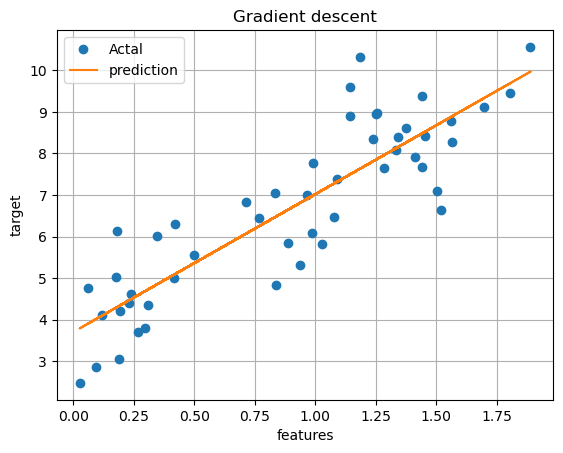

In [16]:
plt.plot(X, y, "o", label="Actal")
plt.plot(X, predictions, label="prediction")
plt.xlabel("features")
plt.ylabel("target")
plt.title("Gradient descent")
plt.legend()
plt.grid()
plt.show()

# ----------------------------------------------------------------------------

# Mini-batch gradient descent

<img src="https://www.researchgate.net/publication/350131240/figure/fig1/AS:1002577621700622@1616044540782/Demonstration-of-contour-optimization-plot-on-Mini-Batch-Gradient-Descent.png" alt="Your Image" width="1000" height="500"/>


`Understanding Mini-Batch Gradient Descent`

Mini-Batch Gradient Descent is a variation of the gradient descent algorithm used to optimize functions, including in machine learning tasks such as linear regression. It combines aspects of both stochastic gradient descent (SGD) and batch gradient descent to balance computational efficiency and convergence speed.

`Application in Linear Regression`

Linear regression is a fundamental statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal is to find the best-fitting line that describes this relationship. Gradient Descent, including Mini-Batch Gradient Descent, plays a crucial role in optimizing the parameters (coefficients) of this line to minimize the error between the predicted values and the actual values.

`Step-by-Step Explanation of Mini-Batch Gradient Descent:`

1-Initialize Parameters:

* Begin by initializing the coefficients (parameters) of the linear regression model randomly.

2-Divide Data into Mini-Batches:

* Split the training dataset into small random subsets called mini-batches. Each mini-batch contains a fixed number of training examples, typically ranging from 16 to 256 samples.

3-Iterative Optimization:

* For each mini-batch:

    1-Compute Predictions:
    * Use the current coefficients to compute the predicted values for the data points in the mini-batch.
    
    2-Calculate Error:
    * Calculate the error between the predicted values and the actual values in the mini-batch. This error is typically measured using the Mean Squared Error (MSE).
    
    3-Compute Gradient:
    * Compute the gradient of the MSE cost function with respect to each coefficient. The gradient indicates the direction and magnitude of the steepest increase in error.
    
  4-Update Coefficients:
  * Adjust the coefficients by moving in the direction opposite to the gradient. This step is taken to reduce the error. The adjustment is made using a learning rate, which controls the step size.
  
 4-Repeat Until Convergence:

* Repeat the process for all mini-batches and continue iterating through the entire dataset multiple times (epochs) until the coefficients converge to values that minimize the MSE. Convergence is typically achieved when changes in the coefficients between iterations are below a certain threshold.

`Advantages of Mini-Batch Gradient Descent:`

1-Efficiency:
* Mini-batch gradient descent reduces the computational cost compared to batch gradient descent by updating parameters more frequently and not using the entire dataset at once.

2-Stability:
* It provides a smoother and more stable convergence than stochastic gradient descent by averaging over multiple examples in each mini-batch.

3-Parallelization:
* It allows for efficient use of modern computing architectures, such as GPUs, by processing mini-batches in parallel.

`Summary`

In the context of linear regression, Mini-Batch Gradient Descent optimizes the coefficients of the regression line to minimize the Mean Squared Error. By iteratively adjusting the coefficients using gradients computed on mini-batches of the training data, it balances computational efficiency and stability, ultimately leading to a better fit of the model to the data.

In [27]:
def mini_batch_gradient_descent(features, target, iterations=100000, tolerance=0.0001, learning_rate=0.01, batch_size=16):
    """
    Perform mini-batch gradient descent to minimize the cost function for linear regression.
    
    Parameters:
    features (np.ndarray): Feature matrix (m x n) where m is the number of samples and n is the number of features.
    target (np.ndarray): Target vector (m x 1) where m is the number of samples.
    iterations (int): Maximum number of iterations for the gradient descent algorithm.
    tolerance (float): The tolerance for the convergence of the cost function.
    learning_rate (float): The learning rate for the gradient descent updates.
    batch_size (int): The number of samples per batch for mini-batch gradient descent.
    
    Returns:
    np.ndarray: The optimized theta parameters (n x 1).
    """
    m, n = features.shape
    thetas = np.random.random(n)
    cost_function_history = []
    
    for iteration in range(iterations):
        for i in range(0, m, batch_size):
            X_batch = features[i:i+batch_size]
            y_batch = target[i:i+batch_size]
            
            predictions = X_batch @ thetas
            error = predictions - y_batch
            gradient = (X_batch.T @ error) / batch_size
            thetas = thetas - learning_rate * gradient
        
        # Calculate cost function for convergence check
        predictions_full = features @ thetas
        error_full = predictions_full - target
        cost_function = (1 / (2 * m)) * np.sum(error_full ** 2)
        cost_function_history.append(cost_function)
        
        if cost_function <= tolerance:
            print("Tolerance achieved")
            print(f"Thetas: {thetas}")
            break
            
    print(f"Number of iterations: {iteration + 1}")
    return thetas, cost_function_history


thetas, cost_history = mini_batch_gradient_descent(features=X_new, target=y)
print(thetas)

Number of iterations: 100000
[3.69938232 3.3218981 ]


In [28]:
Cost_history = pd.DataFrame({"Cost History":cost_history })
Cost_history.head()

,Cost History
0,16.103229
1,14.297278
2,12.700381
3,11.288340
4,10.039757


In [29]:
predictions = X_new @ thetas.T
predictions

array([8.74233589, 4.00508807, 8.25939002, 7.86272796, 6.64566315,
       6.48383971, 4.34304542, 8.90059941, 4.29244268, 4.72859042,
       6.98344832, 4.48561955, 8.14974256, 5.09491967, 5.08483872,
       7.63769627, 6.90539109, 7.11522306, 3.78635365, 8.48678298,
       8.12385472, 9.33410422, 7.31548868, 8.52496249, 8.68891371,
       6.24897969, 4.29612502, 9.69425794, 8.87688568, 4.33405275,
       6.47040537, 4.67757685, 4.58203834, 8.38826545, 8.48546692,
       6.97020482, 3.90150992, 4.09469543, 5.36101646, 7.27725478,
       9.97271817, 6.06834183, 6.81535995, 7.81196634, 7.49835067,
       4.84433915, 7.50122808, 4.46699012, 7.84653452, 7.95882871])

In [30]:
df = pd.DataFrame({"Actual":y , "prediction":predictions})
df

,Actual,prediction
0,6.638731,8.742336
1,2.866454,4.005088
2,8.613176,8.259390
3,8.963922,7.862728
4,5.841610,6.645663
5,4.826291,6.483840
6,4.204867,4.343045
7,8.286345,8.900599
8,5.021057,4.292443
9,4.346022,4.728590


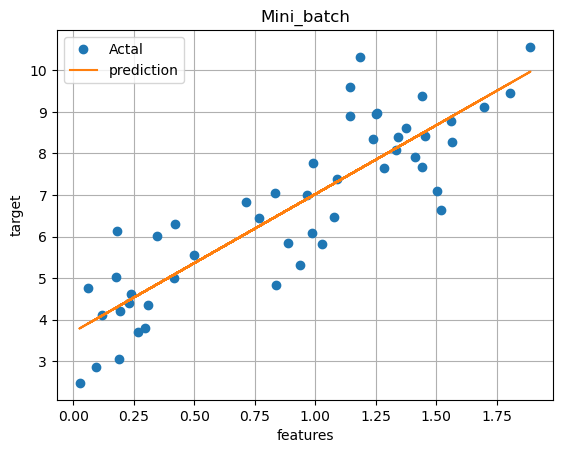

In [31]:
plt.plot(X, y, "o", label="Actal")
plt.plot(X, predictions, label="prediction")
plt.xlabel("features")
plt.ylabel("target")
plt.title("Mini_batch")
plt.legend()
plt.grid()
plt.show()

# -----------------------------------------------------------------------------

# Stochastic gradient descent

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/0*SzSx1YbyMc6EAc85.png" alt="Your Image" width="1000" height="500"/>


`Understanding Stochastic Gradient Descent`

Stochastic Gradient Descent (SGD) is an iterative optimization algorithm that, unlike batch gradient descent, updates the model parameters for each training example one at a time. This approach introduces more noise into the updates but can often lead to faster convergence and is especially useful for large datasets.

`Application in Linear Regression`

Linear regression is a fundamental statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal is to find the best-fitting line that describes the relationship between these variables. Stochastic Gradient Descent plays a crucial role in optimizing the parameters (coefficients) of this line to minimize the error between the predicted values and the actual values.

`Step-by-Step Explanation of Stochastic Gradient Descent:`

1-Initialize Parameters:

* Begin by initializing the coefficients (parameters) of the linear regression model randomly.

2-Iterative Optimization:

* For each training example:

    1-Compute Prediction:

    * Use the current coefficients to compute the predicted value for the current training example.

    2-Calculate Error:

    * Calculate the error between the predicted value and the actual value of the training example. This error is typically measured using the squared error.

    3-Compute Gradient:

    * Compute the gradient of the squared error cost function with respect to each coefficient based on the current training example. The gradient indicates the direction and magnitude of the steepest increase in error for that example.

    4-Update Coefficients:

    * Adjust the coefficients by moving in the direction opposite to the gradient. This step is taken to reduce the error. The adjustment is made using a learning rate, which controls the step size.


3-Repeat Until Convergence:

* Repeat the process for all training examples and continue iterating through the entire dataset multiple times (epochs) until the coefficients converge to values that minimize the Mean Squared Error (MSE). Convergence is typically achieved when changes in the coefficients between iterations are below a certain threshold.

`Advantages of Stochastic Gradient Descent:`

1-Efficiency:

* SGD is computationally efficient, especially for large datasets, because it updates the model parameters more frequently and does not require the entire dataset to be loaded into memory.

2-Faster Convergence:

* It often converges faster than batch gradient descent because it updates the parameters after each training example, which can lead to quicker learning in practice.

3-Escaping Local Minima:

* The noise introduced by updating parameters for each example can help SGD escape local minima, potentially finding a better overall solution.


`Summary`

In the context of linear regression, Stochastic Gradient Descent optimizes the coefficients of the regression line to minimize the Mean Squared Error. By iteratively adjusting the coefficients using gradients computed from individual training examples, the algorithm seeks to find the best-fitting line that describes the relationship between the dependent and independent variables. This iterative process continues until the coefficients converge to values that result in the lowest possible error, thus achieving a better fit of the model to the data.

In [22]:
def stochastic_gradient_descent(features, target, iterations=100000, tolerance=0.0001, learning_rate=0.01):
    """
    Perform stochastic gradient descent to minimize the cost function for linear regression.
    
    Parameters:
    features (np.ndarray): Feature matrix (m x n) where m is the number of samples and n is the number of features.
    target (np.ndarray): Target vector (m x 1) where m is the number of samples.
    iterations (int): Maximum number of iterations for the gradient descent algorithm.
    tolerance (float): The tolerance for the convergence of the cost function.
    learning_rate (float): The learning rate for the gradient descent updates.
    
    Returns:
    np.ndarray: The optimized theta parameters (n x 1).
    """
    m, n = features.shape
    thetas = np.random.random(n)
    cost_function_history = []
    
    for iteration in range(iterations):
        for i in range(m):
            X_i = features[i:i+1]
            y_i = target[i:i+1]
            
            predictions = X_i @ thetas
            error = predictions - y_i
            gradient = X_i.T @ error
            thetas = thetas - learning_rate * gradient
        
        # Calculate cost function for convergence check
        predictions_full = features @ thetas
        error_full = predictions_full - target
        cost_function = (1 / (2 * m)) * np.sum(error_full ** 2)
        cost_function_history.append(cost_function)
        
        if cost_function <= tolerance:
            print("Tolerance achieved")
            print(f"Thetas: {thetas}")
            break
            
    print(f"Number of iterations: {iteration + 1}")
    return thetas, cost_function_history


thetas, cost_history = stochastic_gradient_descent(features=X_new, target=y)
print(thetas)

Number of iterations: 100000
[3.7369452  3.33956223]


In [23]:
Cost_history = pd.DataFrame({"Cost History":cost_history })
Cost_history.head()

,Cost History
0,2.614316
1,0.800944
2,0.561529
3,0.530807
4,0.525740


In [24]:
predictions = X_new @ thetas.T
predictions

array([ 8.80671457,  4.04427653,  8.32120065,  7.92242934,  6.69889282,
        6.53620888,  4.38403096,  8.96581966,  4.33315914,  4.77162609,
        7.03847415,  4.52736323,  8.21097014,  5.13990329,  5.12976874,
        7.69620105,  6.96000185,  7.1709496 ,  3.824379  ,  8.54980277,
        8.18494464,  9.40162962,  7.37228013,  8.58818529,  8.75300832,
        6.3001    ,  4.33686106,  9.76369844,  8.94197982,  4.37499048,
        6.52270311,  4.72034125,  4.62429472,  8.45076137,  8.5484797 ,
        7.02516023,  3.94014761,  4.13436038,  5.40741504,  7.33384292,
       10.04363938,  6.1185016 ,  6.86949197,  7.87139779,  7.55611448,
        4.88799031,  7.5590072 ,  4.50863474,  7.90614979,  8.01904111])

In [25]:
df = pd.DataFrame({"Actual":y , "prediction":predictions})
df

,Actual,prediction
0,6.638731,8.806715
1,2.866454,4.044277
2,8.613176,8.321201
3,8.963922,7.922429
4,5.841610,6.698893
5,4.826291,6.536209
6,4.204867,4.384031
7,8.286345,8.965820
8,5.021057,4.333159
9,4.346022,4.771626


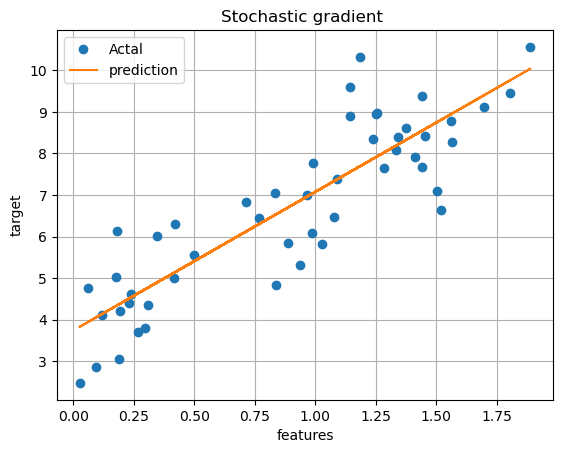

In [26]:
plt.plot(X, y, "o", label="Actal")
plt.plot(X, predictions, label="prediction")
plt.xlabel("features")
plt.ylabel("target")
plt.title("Stochastic gradient ")
plt.legend()
plt.grid()
plt.show()

# -------------------------------------------------------

# Test on actual dataset to get the thetas 

In [33]:
df = pd.read_csv(r"D:\2-Machine Learning\Dataset For Machine Learning\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
df = df.dropna()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
X_features = df.drop(columns=["Outcome"], axis=0)
target = df["Outcome"]

In [36]:
X_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [37]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)
X_features

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [38]:
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [42]:
# Thetas from gradient descent
thetas, cost_hist = gradient_descent(features=X_features, target=target, iterations=1000)
thetas

array([ 0.07232323,  0.19170733, -0.04459829,  0.0042137 , -0.02319311,
        0.10300156,  0.04909033,  0.02690375])

In [43]:
# Thetas from Mini-batch gradient descent
thetas, cost_hist = mini_batch_gradient_descent(features=X_features, target=target, iterations=1000)
thetas

Number of iterations: 1000


array([ 0.0693143 ,  0.19408184, -0.044724  ,  0.00309666, -0.02112553,
        0.10477311,  0.0460605 ,  0.03431993])

In [44]:
# Thetas from Stochastic gradient descent
thetas, cost_hist = stochastic_gradient_descent(features=X_features, target=target, iterations=1000)
thetas

Number of iterations: 1000


array([ 0.0690296 ,  0.27071985, -0.02892257, -0.00799589, -0.02775262,
        0.10868936, -0.00589823,  0.0932668 ])

### ---------------------------------------------------

In [52]:
def ContactMe():

    html_content = """
    <h2 style='color: #1e6091; font-weight: bold; font-family: sans-serif;'>Connect with me</h2>
    <style>
        .social-icon {
            display: inline-block;
            width: 30px;
            height: 30px;
            margin-right: 10px;
            cursor: pointer;
        }
        .linkedin-logo {
            background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/LinkedIn_logo_initials.png/600px-LinkedIn_logo_initials.png');
            background-size: cover;
        }
        .whatsapp-logo {
            background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/WhatsApp.svg/800px-WhatsApp.svg.png');
            background-size: cover;
        }
        .kaggle-logo {
            background-image: url('https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png');
            background-size: 90%;
            background-position: center;
        }
        .github-logo {
            background-image: url('https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg');
            background-size: cover;
            filter: invert(100%);
        }
        .social-link {
            font-size: 18px;
            color: #666;
            text-decoration: none;
        }
    </style>

    <a href='https://www.linkedin.com/in/mohammed-hamza-4184b2251/' target='_blank' class='social-link'>
        <div class='social-icon linkedin-logo'></div>
        LinkedIn
    </a>

    <a href='https://wa.me/201092317942' target='_blank' class='social-link'>
        <div class='social-icon whatsapp-logo'></div>
        WhatsApp
    </a>

    <a href='https://www.kaggle.com/mohammedhamzamoawad' target='_blank' class='social-link'>
        <div class='social-icon kaggle-logo'></div>
        Kaggle
    </a>

    <a href='https://github.com/MohammedHamza0' target='_blank' class='social-link'>
        <div class='social-icon github-logo'></div>
        GitHub
    </a>
    """

    display(HTML(html_content))

# By: Moahmmed Hamza

In [53]:
ContactMe()